In [1]:
import pandas as pd
from fbprophet import Prophet

In [3]:
train = pd.read_csv('D:/ML/HFenergy/风场1/x26/new.csv')
train.columns = ['ds','power', 'temp', 'y', 'wnd_spd']
del train['power']
del train['wnd_spd']
del train['temp']
train=train[-train.ds.isin(['time'])]
train=train.dropna()
train.head(5724)

,ds,y
0,2018-01-01 00:00:00,0.0496293
1,2018-01-01 00:00:30,0.0475001
2,2018-01-01 00:01:00,0.0285176
3,2018-01-01 00:01:30,0.0171296
4,2018-01-01 00:02:00,0.0240743
...,...,...
5740,2018-01-02 23:49:30,0.2932407
5762,2018-01-03 00:00:00,0.2827778
5763,2018-01-03 00:00:30,0.2848148
5764,2018-01-03 00:01:00,0.2865741


In [5]:
m = Prophet().fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(freq='H',periods=20)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat']].tail()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


NameError: name 'forecast' is not defined

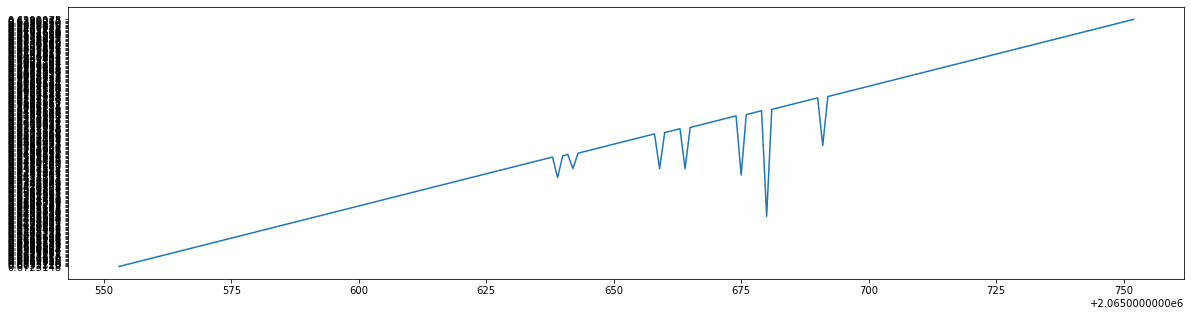

In [17]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,5))

plt.plot(train["y"][-200:], label="real")
plt.plot(range(len(train)-200,len(train)),forecast['yhat'][-200:], label="predict")
plt.legend()
plt.show()